<a href="https://colab.research.google.com/github/majulong/mini-project/blob/main/mnist-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


loading the dataset


In [23]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) =mnist.load_data()



getting the Dataset



In [24]:
train_images.shape

(60000, 28, 28)

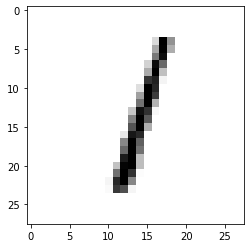

In [25]:
digit = train_images[150]
# print(digit)
import matplotlib.pyplot as plt
# plt.imshow(digit, cmap=plt.cm.binary)
# plt.show()

plt.imshow(test_images[2], cmap = plt.cm.binary)
plt.show()

Converting the Images from 0-255 range to 0-1 range

In [27]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Creating and compiling the Network (or the Model)

In [28]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Converting the output in 0 to 9 form. For representing each digit
For example, 5 is represented by 0,0,0,0,0,1,0,0,0,0



In [29]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train the network by calling the fit() function

In [30]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.9041 - accuracy: 0.5197
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6702 - accuracy: 0.8361
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4284 - accuracy: 0.8864
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3550 - accuracy: 0.9002
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3297 - accuracy: 0.9051


Evaluate the network

In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.9132
0.9132000207901001


Prediction using our network

In [34]:
prediction = network.predict(test_images)
import numpy as np
np.argmax(prediction[0])

7

# New Section